## Importing packages

In [1]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

Warning message:
"package 'here' was built under R version 4.1.1"
here() starts at C:/Users/maria/Desktop/Programacao/IC/projetos/Barreiras-e-Facilitadores

Warning message:
"package 'ggplot2' was built under R version 4.1.1"
Warning message:
"package 'cluster' was built under R version 4.1.3"
Warning message:
"package 'cowplot' was built under R version 4.1.1"
Warning message:
"package 'randomForest' was built under R version 4.1.1"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Warning message:
"package 'caret' was built under R version 4.1.1"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.1.1"
Warning message:
"package 'rpart.plot' was built under R version 4.1.1"
Carregando pacotes exigidos: rpart

Warning message:
"package 'readxl' was built under R version 4.1.2"
Warning message:
"package 'e107

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

[[29]]
[1] TRUE

[[30]]
[1] TRUE

[[31]]
[1] TRUE

[[32]]
[1] TRUE

[[33]]
[1] TRUE

[[34]]
[1] TRUE

[[35]]
[1] TRUE

[[36]]
[1] TRUE

[[37]]
[1] TRUE

[[38]]
[1] TRUE

[[39]]
[1] TRUE

[[40]]
[1] TRUE

[[41]]
[1] TRUE

## Clustering - Rock Silhoette

In [2]:
df_during_facilitators_dist <- distinct(df_during_facilitators)
nrow(df_during_facilitators_dist)

[1] 50

In [3]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


### Silhoette 
<hr />

In [4]:
df_matrix <- data.matrix(df_during_facilitators_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_facilitators_dist) - similarity_matrix
head(dissimilarity_matrix)

0,2,1,2,4,1,2,1,3,2,...,2,3,3,3,3,4,5,4,1,2
2,0,3,2,4,3,2,1,1,2,...,4,3,3,3,3,4,5,2,3,4
1,3,0,3,3,2,3,2,4,1,...,3,2,2,2,4,5,4,3,2,1
2,2,3,0,2,3,2,1,3,2,...,2,5,3,3,5,2,3,4,3,4
4,4,3,2,0,3,2,3,3,2,...,2,5,3,3,5,2,1,4,5,4
1,3,2,3,3,0,1,2,2,3,...,1,4,4,4,2,3,4,5,2,3


#### Scanning parameters


In [5]:
source(here('Modules','modules.R'))
dists <- c("cosine", "jaccard", "hamman", "simple matching", "faith")
thetas <- linspace(0, 0.99, 15)
nt <- length(thetas)
nd <- length(dists)
nk <- nrow(distinct(df_during_facilitators))
scs <- c()
# for (t in thetas) {
#     for (d in dists){
#         for (k in 2:nk) {
#             sc <- silhouette_values_rock(
#                 num_clusters = k,
#                 theta = t,
#                 df = df_during_facilitators_dist,
#                 distmethod = d,
#                 diss_matrix = dissimilarity_matrix)[[1]]
#             scs <- append(scs, sc)
#         }
#     }
# }


In [6]:
# ks_by_theta <- data.frame(
#     theta=rep(thetas, each=((nk-1)*nd)), 
#     dist=rep(rep(dists, each=(nk-1)), nt), 
#     k=rep(2:nk, nd*nt), scs=scs
# )

# write.csv(
#     ks_by_theta,
#     "silhouette_rock_facilitators.csv", row.names = FALSE
# )

####  Best Situations

In [6]:
scs <- read.csv("silhouette_rock_facilitators.csv")
scs %>% group_by(dist) %>% slice(which.max(scs))

theta,dist,k,scs
<dbl>,<chr>,<int>,<dbl>
0.1414286,cosine,15,0.27551969
0.2121429,faith,8,0.27622018
0.0000000,hamman,6,0.06613642
0.1414286,jaccard,15,0.27551969
0.3535714,simple matching,14,0.20897274


In [7]:
best_situtation <- scs[scs['scs'] == max(scs['scs']), ]
best_situtation

,theta,dist,k,scs
,<dbl>,<chr>,<int>,<dbl>
938,0.2121429,faith,8,0.2762202


In [8]:
best_theta_rock <- best_situtation[1, 'theta']
best_dist_rock <- best_situtation[1, 'dist']
best_K_rock <- best_situtation[1, 'k']
sil <- best_situtation[1, 'scs']

print("Best K")
print(best_K_rock)
print("Best Theta")
print(best_theta_rock)
print('Best dist')
print(best_dist_rock)
print("Silhouette")
print(sil)

[1] "Best K"
[1] 8
[1] "Best Theta"
[1] 0.2121429
[1] "Best dist"
[1] "faith"
[1] "Silhouette"
[1] 0.2762202


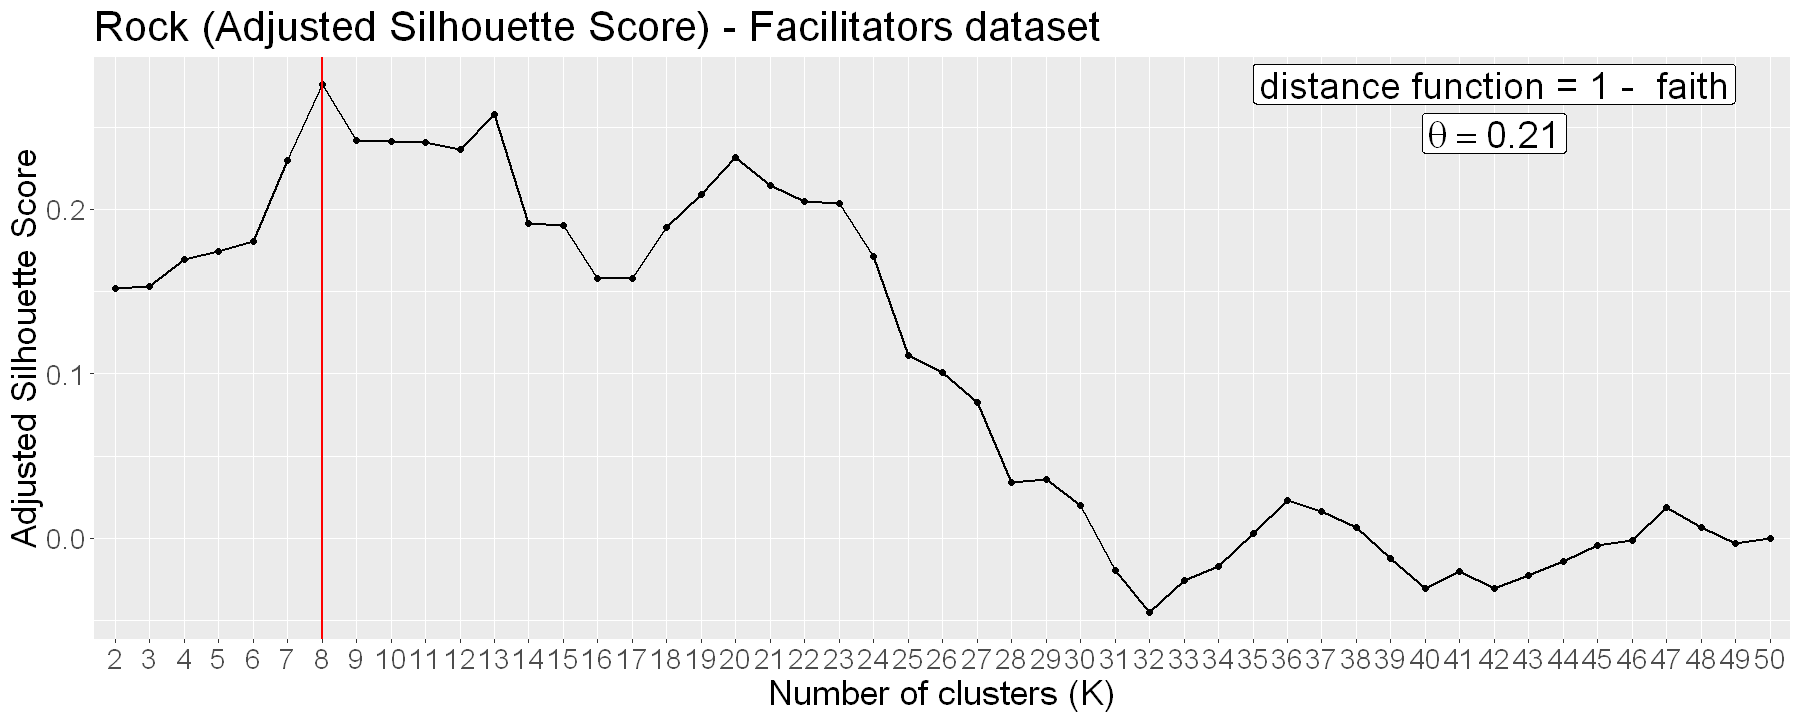

In [11]:
label1 = paste("theta == ", round(best_theta_rock, 2))
label2 =paste('distance function = 1 - ', best_dist_rock)
options(repr.plot.width = 15, repr.plot.height =6)
ggplot(data=scs[(scs$dist == best_dist_rock) & (scs$theta == best_theta_rock), ], aes(x=factor(k), y=scs, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_rock-1, color = "red", size=0.8) + 
    ggtitle("Rock (Adjusted Silhouette Score) - Facilitators dataset") +
    xlab('Number of clusters (K)') +
    ylab('Adjusted Silhouette Score') +
    annotate("label", x = 41, y = sil-0.03, parse = TRUE, label=label1, size=8) +
    annotate("label", x = 41, y = sil, label=label2, size=8)  + 
    theme(text = element_text(size = 21)) 


ggsave(path="graphs", file="metric_evolution_facilitators_RS.jpeg", width = 15, height = 6)

#### Evaluating the silhuette coefficient for situation

In [13]:
silhoutte_result <- silhouette_values_rock(best_K_rock, best_theta_rock, df_during_facilitators_dist, dissimilarity_matrix, best_dist_rock)

Clustering:
computing distances ...
computing links ...
computing clusters ...


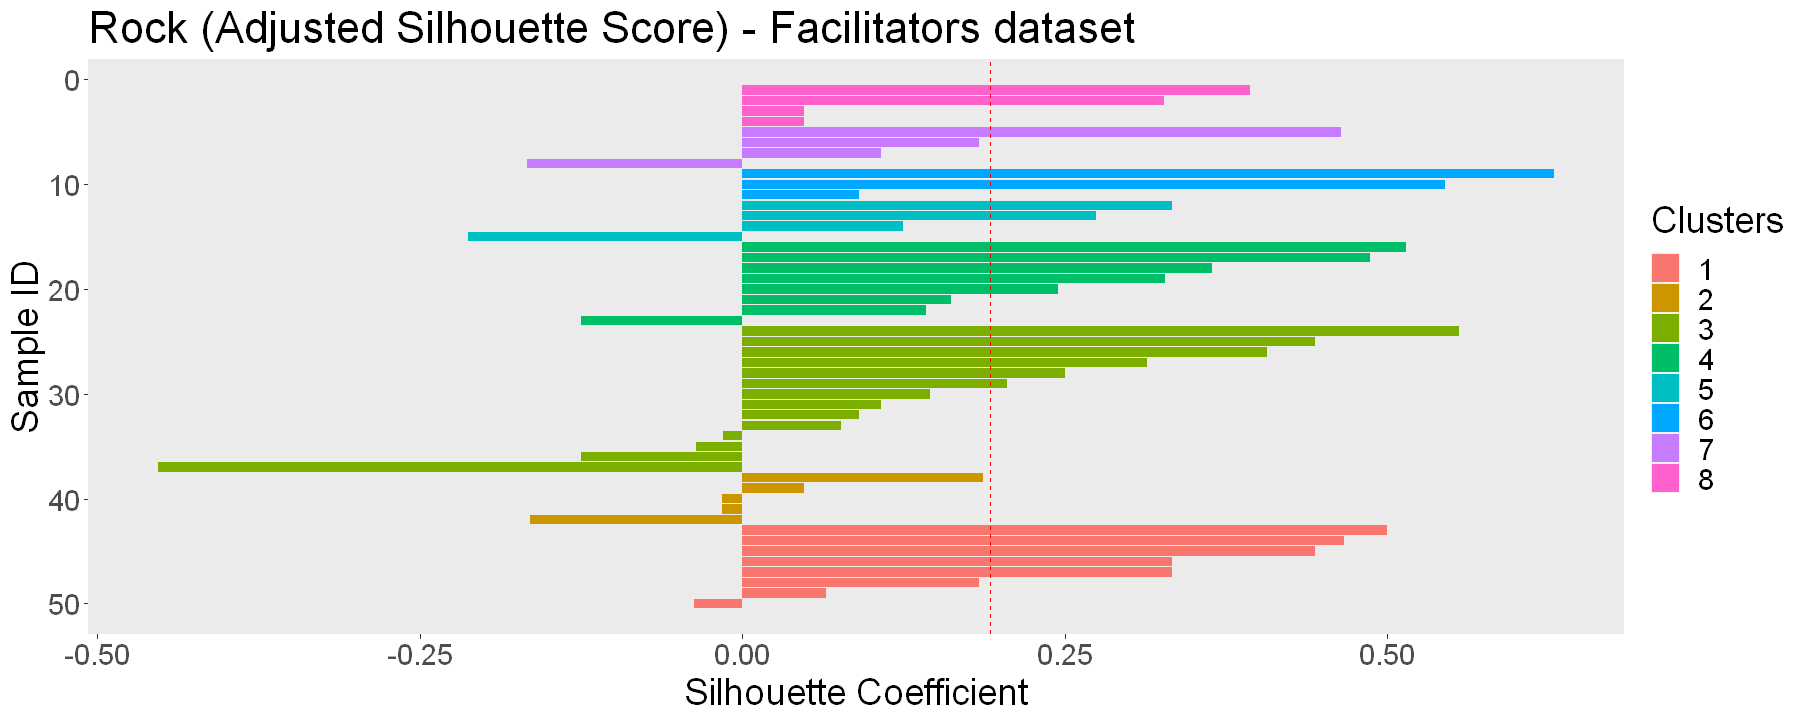

In [14]:

coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cl)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))

ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  ggtitle("Rock (Adjusted Silhouette Score) - Facilitators dataset") +
  xlab("Sample ID") +
  ylab("Silhouette Coefficient") + 
  scale_fill_discrete(name = "Clusters") + 
  theme(text = element_text(size = 22)) 

ggsave(path="graphs", file="coefficients_RS.jpeg", width = 11, height = 5)


## Exploring Kmodes best k

In [13]:
df_during_facilitators_dist$cluster <-rockCluster(df_matrix, n=best_K_rock, theta=best_theta_rock, fun = "dist", funArgs = list(method=best_dist_rock))$cl
head(df_during_facilitators_dist)

Clustering:
computing distances ...
computing links ...
computing clusters ...


PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group,cluster
1,0,0,0,1,0,1
0,0,0,0,0,0,2
1,1,0,0,1,0,3
0,0,0,0,1,1,2
0,1,1,0,1,1,3
1,0,1,0,1,0,1


In [14]:
joint <- c(
    'PA_easiness_outdoor_activities'='PA_easiness_outdoor_activities',
    'PA_easiness_professional_guidance' = 'PA_easiness_professional_guidance',
    'PA_easiness_music' = 'PA_easiness_music',
    'PA_easiness_others' = 'PA_easiness_others',
    'PA_facilitator_home' = 'PA_facilitator_home',
    'PA_facilitator_group' = 'PA_facilitator_group'
)

df_during_facilitators <- left_join(df_during_facilitators, df_during_facilitators_dist, by = joint)
df_during$cluster <- df_during_facilitators$cluster
df_during_barriers$cluster <- df_during_facilitators$cluster

nrow(df_during_facilitators)

[1] 1214

In [15]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
112  87 242 503  52  56  89  73 

### Profile Plots
<hr />

In [16]:
colors <- c("pink1", "violet", "mediumpurple1", "slateblue1", "purple", "purple3",
        "turquoise2", "skyblue", "steelblue", "blue2", "navyblue",
        "orange", "tomato", "coral2", "palevioletred", "violetred", "red2",
        "springgreen2", "yellowgreen", "palegreen4",
        "wheat2", "tan", "tan2", "tan3", "brown",
        "grey70", "grey50", "grey30")

In [ ]:
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_rock
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_barriers, 
    names = names(df_during_barriers[, 1:ncol(df_during_barriers)-1]),
    best_k = best_K_rock
)

#### Mode

In [18]:
modes <- data.frame(matrix(ncol = ncol(df_during_facilitators_dist)-1, nrow = 0))
colnames(modes) <- colnames(df_during_facilitators_dist)[1:ncol(df_during_facilitators_dist)-1]
for( cl in unique(df_during_facilitators_dist$cluster)){
    cl_mode <- unname(apply(df_during_facilitators_dist[df_during_facilitators_dist$cluster == cl, ], 2, modefunc))
    modes[nrow(modes) + 1,] <- cl_mode[1:length(cl_mode)-1]
}

modes

PA_easiness_outdoor_activities,PA_easiness_professional_guidance,PA_easiness_music,PA_easiness_others,PA_facilitator_home,PA_facilitator_group
1,0,1,0,0,0
0,0,0,0,0,1
1,1,1,0,1,0
0,0,0,0,1,1
0,0,1,0,0,0
0,0,0,1,0,0
1,0,0,0,0,0
0,1,0,0,0,0
